In [53]:
import math
import numpy as np
import astropy.cosmology
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.cosmology import Planck18
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [54]:
# constants
# LRG_z_max = 1.6979 (outlier)
# LRG_z_min = -0.0023
# BGS_z_max = 1.6979 (outlier)
# BGS_z_min = -0.0043
LRG_z_mean = 0.6851
LRG_z_max = 1.25
BGS_z_mean = 0.2516
BGS_z_max = 0.7
apature_d = 1.5 # in arcseconds

In [55]:
def vary_angular_sep(z_mean,z_max):
    R_s = 70 * (u.kpc)
    # distances
    d_l_mean = Planck18.angular_diameter_distance(z_mean)
    d_l_max = Planck18.angular_diameter_distance(z_max)
    # angular separation for BGS/LOA based on skyfiber to galaxy center distance plots
    # find r values
    if (z_mean == LRG_z_mean ):
        theta = np.linspace(0.0007909274985968819, 0.005555543236270858,1000000)
        r_theta = theta*3600*4.8481e-6
        r_mean = d_l_mean* np.tan(r_theta)
        r_max = d_l_max* np.tan(r_theta)
    else:
        theta = np.linspace(0.0011956075825011979, 0.005555551126463086,1000000)
        r_theta = theta*3600*4.8481e-6
        r_mean = d_l_mean* np.tan(r_theta)
        r_max = d_l_max* np.tan(r_theta)

    # ρ_mean/ρ_0
    ratio_mean = r_mean/ (R_s.to(u.Mpc) )
    ρ_mean = 1/(ratio_mean * (1+ratio_mean)**2)

    # ρ_max/ρ_0
    ratio_max = r_max/(R_s.to(u.Mpc) )
    ρ_max = 1/(ratio_max * (1+ratio_max)**2)
    
    # plot mean and max on same graph
    plt.figure(figsize=(14, 6))
    plt.plot(np.log10(ratio_mean),np.log10(ρ_mean), label = "mean redshift",alpha = 0.7)
    plt.plot(np.log10(ratio_max),np.log10(ρ_max), label = "max redshift", alpha = 0.7)
    plt.xlabel(r'$log(r_{mean} / R_s)$')
    plt.ylabel(r'$log(ρ / ρ_{0})$')
    if (z_mean == LRG_z_mean ):
        plt.title(r'LRG NFW Density Profile for $R_s$' f'={R_s}')
    else:
        plt.title(r'BGS NFW Density Profile for $R_s$' f'={R_s}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot the ratio at same theta
    plt.figure(figsize=(14, 6))
    plt.plot(theta*3600, ρ_mean / ρ_max)
    plt.xlabel(r'$θ[arcsec]$')
    plt.ylabel(r'$\rho(z_{mean}) / \rho(z_{max})$')
    plt.grid(True)
    if (z_mean == LRG_z_mean):
        plt.title(r'LRG Density Ratio for $R_s$' f'={R_s}')
    else:
        plt.title(r'BGS Density Ratio for $R_s$' f'={R_s}')
    plt.show()

    return ρ_mean, r_mean, ρ_max,r_max

LRG:


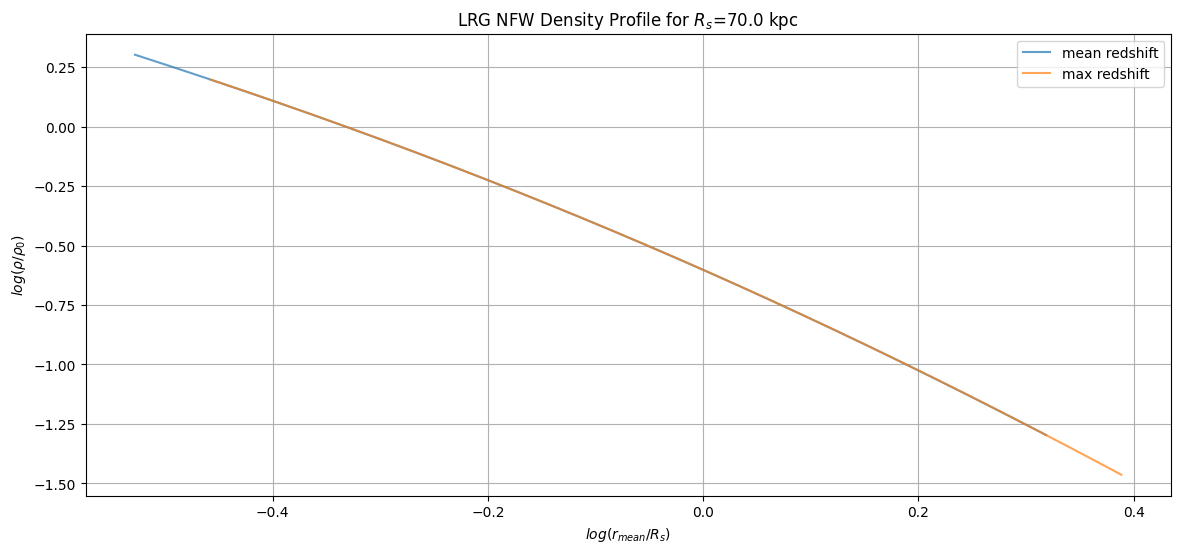

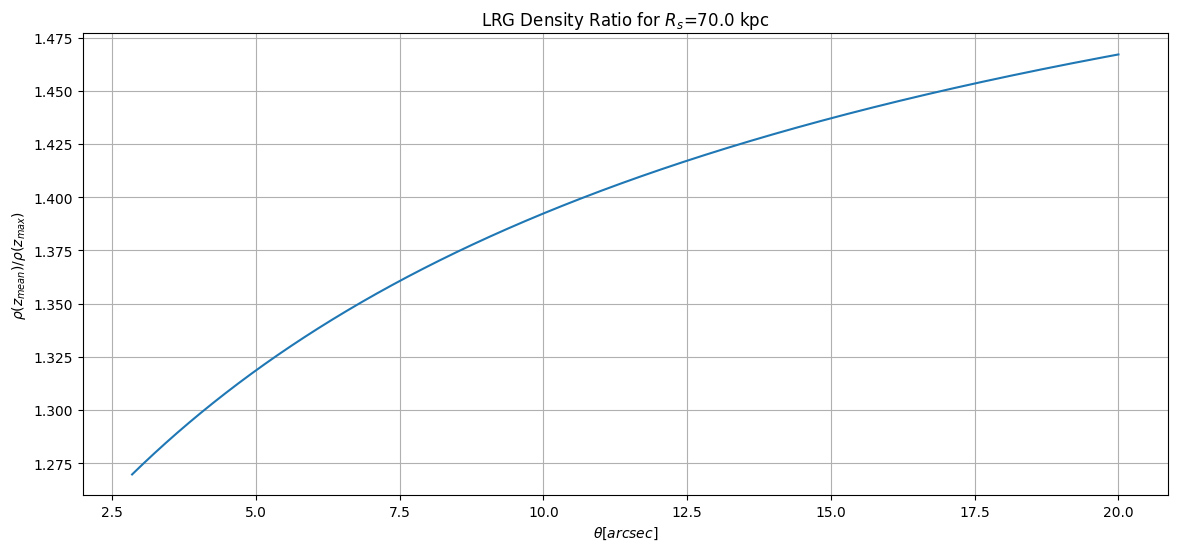

BGS:


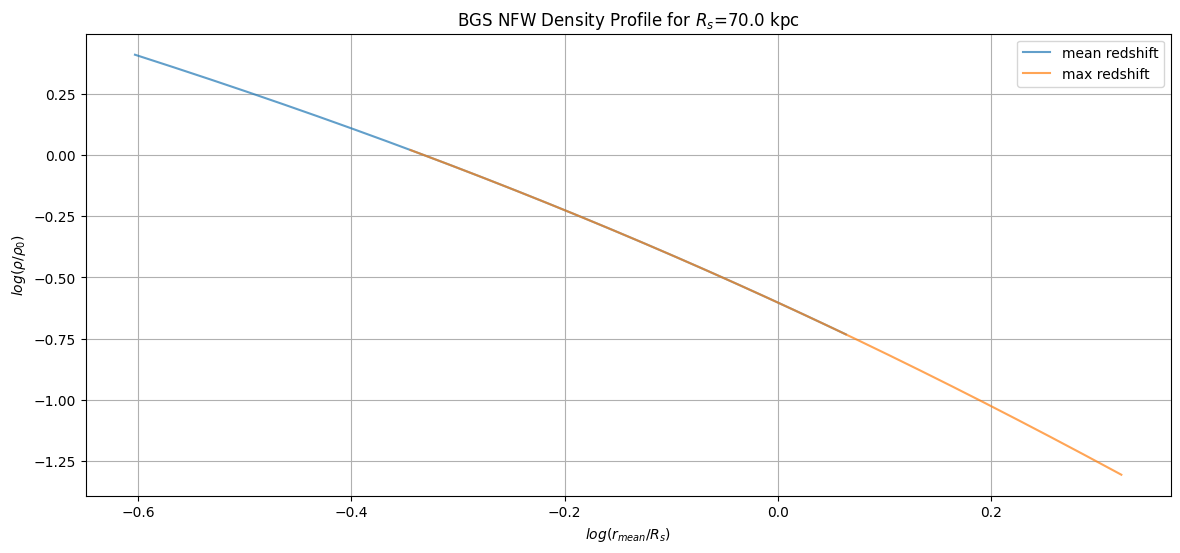

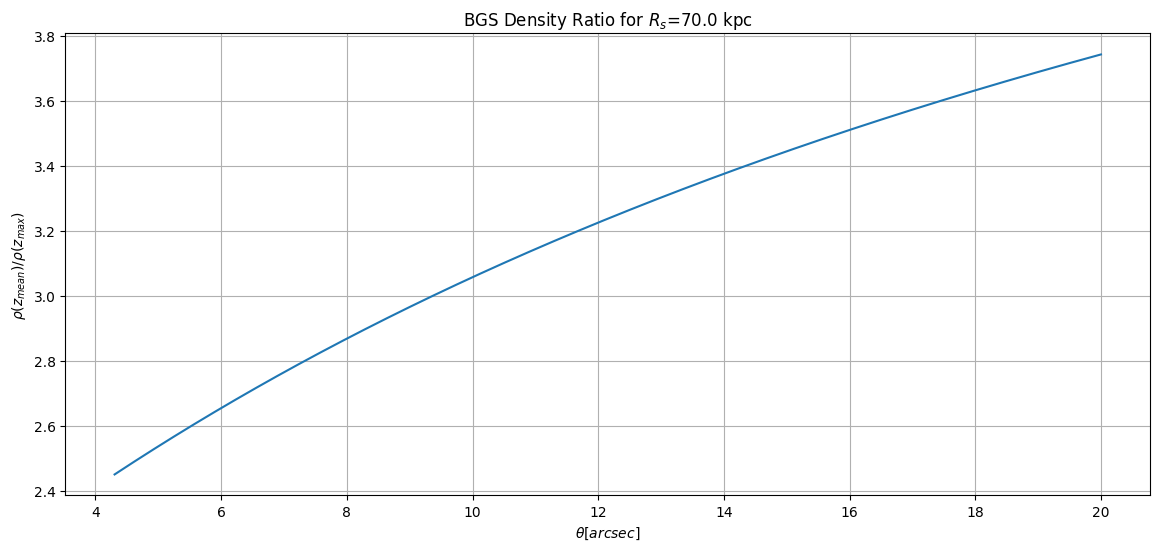

In [56]:
print("LRG:")
LRG_ρ_mean, LRG_r_mean, LRG_ρ_max, LRG_r_max = vary_angular_sep(LRG_z_mean,LRG_z_max)
print("BGS:")
BGS_ρ_mean, BGS_r_mean, BGS_ρ_max, BGS_r_max = vary_angular_sep(BGS_z_mean,BGS_z_max)